In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# %pip install h5py graphviz pydot


In [92]:

data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [93]:
df = data.copy()
ds = data.copy()
# ds.info()

In [51]:
ds.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [94]:
ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [95]:
categorical = ds.select_dtypes(exclude = 'number')
numerical = ds.select_dtypes(include = 'number')

print(f"\t\t\t\t\tCategorical ds")
display(categorical.head(3))

print(f"\n\n\t\t\t\t\tNumerical ds")
display(numerical.head(3))

					Categorical ds


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up




					Numerical ds


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0


In [97]:
import pickle
from collections import defaultdict

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create LabelEncoder and StandardScaler instances
lbl_en = defaultdict(LabelEncoder)
scaler = StandardScaler()

# Assuming ds is your DataFrame
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']  # Add your numeric columns here

# Apply LabelEncoder to categorical columns
tmp_dfl = ds[columns_to_encode].apply(lambda x: lbl_en[x.name].fit_transform(x))

# Apply StandardScaler to numeric columns
ds[columns_to_scale] = scaler.fit_transform(ds[columns_to_scale])

# Save LabelEncoder, StandardScaler, and other necessary information
filename = 'labSca.sav'
data_to_save = {
    'label_encoders': dict(lbl_en),
    'scaler': scaler,
    # Add any other information you want to save
}

pickle.dump(data_to_save, open(filename, 'wb'))

In [98]:
ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

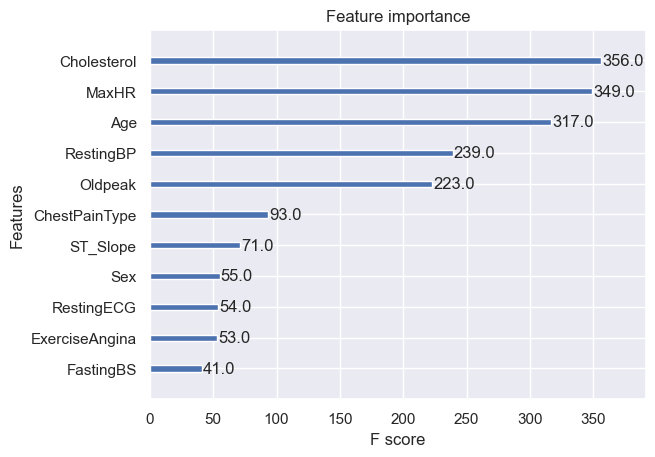

In [99]:
x = ds.drop('HeartDisease',axis=1)
y = df.HeartDisease
#using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x,y)

# first feature importance scores
xgb.plot_importance(model)

In [22]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [100]:
# feature selection
selected_columns = ['Age', 'Sex', 'Cholesterol', 'MaxHR', 'RestingBP', 'Oldpeak', 'ChestPainType', 'ST_Slope']
new_ds = ds[selected_columns]
new_ds.head()

,Age,Sex,Cholesterol,MaxHR,RestingBP,Oldpeak,ChestPainType,ST_Slope
0,-1.433140,1,0.825070,1.382928,0.410909,-0.832432,1,2
1,-0.478484,0,-0.171961,0.754157,1.491752,0.105664,2,1
2,-1.751359,1,0.770188,-1.525138,-0.129513,-0.832432,1,2
3,-0.584556,0,0.139040,-1.132156,0.302825,0.574711,0,1
4,0.051881,1,-0.034755,-0.581981,0.951331,-0.832432,2,2


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(new_ds, y, test_size = 0.10, random_state = 47, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (826, 8)
x_test: (92, 8)
y_train: (826,)
y_test: (92,)


In [104]:
# DEEPE LEARNING MODEL

model = tf.keras.Sequential([ #........................ Instantiate the model creating class.
    tf.keras.layers.Dense(units=12, activation='relu'), #... Input layer of 12 features
    tf.keras.layers.Dense(20, activation='relu'), #.... Add the second 20 layer, and instantiate the activation to be used.
    tf.keras.layers.Dense(40, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(20, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(40, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(1, activation='sigmoid') #... Add the last output layer
])
model.compile(optimizer='adam', # ..................... The optimizer that adjusts weight and bias for a given neuron
              loss = 'binary_crossentropy', #...... Loss calculates the error of the prediction
              metrics=['accuracy']) #.................. Accuracy calculates the precision of the prediction.

model.fit(x_train, y_train, epochs=25) #..... Fit the model on the dataset and define the number of epochs

Epoch 1/25
26/26 [==============================] - 3s 6ms/step - loss: 0.6629 - accuracy: 0.6852
Epoch 2/25
26/26 [==============================] - 0s 8ms/step - loss: 0.5577 - accuracy: 0.7785
Epoch 3/25
26/26 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.7954
Epoch 4/25
26/26 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8123
Epoch 5/25
26/26 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.8232
Epoch 6/25
26/26 [==============================] - 0s 4ms/step - loss: 0.3783 - accuracy: 0.8426
Epoch 7/25
26/26 [==============================] - 0s 4ms/step - loss: 0.3645 - accuracy: 0.8450
Epoch 8/25
26/26 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8547
Epoch 9/25
26/26 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8608
Epoch 10/25
26/26 [==============================] - 0s 4ms/step - loss: 0.3494 - accuracy: 0.8523
Epoch 11/25
26/26 [

In [105]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(f'Test Loss: {score[0]}\Test Accuracy: {score[1]}')

Test Loss: 0.29699376225471497\Test Accuracy: 0.8804348111152649


In [106]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  #............................................... set a 50% confidence level that the customer doesnt stop buying
outcome = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
outcome

3/3 [==============================] - 0s 33ms/step


,Actual,Predicted
623,1,1
643,1,0
741,1,1
860,1,1
123,1,1
...,...,...
543,1,1
837,0,0
181,0,0
149,1,1


In [108]:
data.head(39)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


<Axes: xlabel='HeartDisease', ylabel='count'>

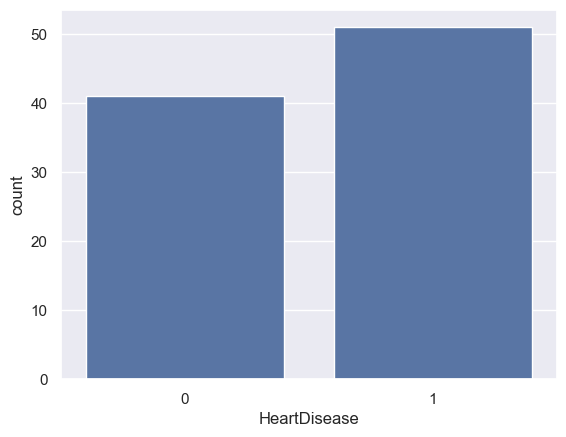

In [34]:
sns.countplot(x = y_test)


              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.86      0.88      0.87        50

    accuracy                           0.86        92
   macro avg       0.86      0.86      0.86        92
weighted avg       0.86      0.86      0.86        92



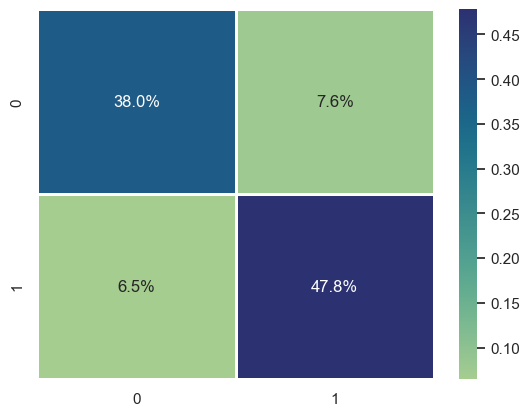

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

revealer = confusion_matrix(y_pred, y_test)
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

print(classification_report(y_pred, y_test))

In [38]:
model.save('heartfailurepred.h5')

c:\Users\SAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [46]:
data.Age.min()

28